In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
from ImageProcessing import ImageProcessing
import numpy as np

In [63]:
ip = ImageProcessing()
image = ip.read_im('images/ocean.png')
#print(image.shape)
#print(5//2)
#ip.show_im(image)

(257, 257, 3)


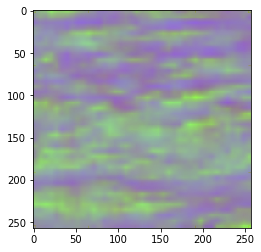

In [131]:
print(image.shape)
v = ip.patch_to_vector(image)
ip.show_im(ip.vector_to_patch(v))

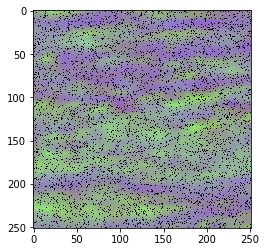

In [132]:
ip.show_im(ip.noise(ip.get_patch(126,126, 250, image), 0.1))

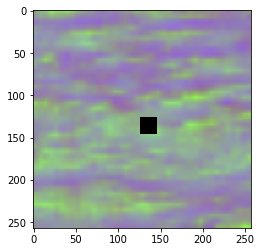

In [135]:
image2 = ip.delete_rect(image, 126,126,20,20)
ip.show_im(image2)

In [148]:
len(ip.get_incomplete_patches(image2, 250))

64

In [7]:
ip.get_all_patches(120,image).shape[0]

19044

In [8]:
from sklearn.feature_extraction.image import extract_patches_2d

In [9]:
extract_patches_2d?

In [71]:
step = 2
xvalues = np.arange(2, 10, 5);
yvalues = np.arange(0, 5, step);

xx, yy = np.meshgrid(xvalues, yvalues)
np.array([xx.flatten(), yy.flatten()])
xvalues

array([2, 7])

In [80]:
im = np.arange(64).reshape((8,8))
print(im)
patches = ip.get_all_patches(image, 64, 32)
print(patches.shape)
print(patches)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
(49, 64, 64, 3)
[[[[0.563786   0.6377952  0.49803922]
   [0.56367046 0.63571435 0.54901963]
   [0.5651042  0.6399999  0.39215687]
   ...
   [0.5714286  0.6176471  0.53333336]
   [0.5714286  0.61313874 0.5372549 ]
   [0.5714286  0.6043166  0.54509807]]

  [[0.5651341  0.6304348  0.5411765 ]
   [0.5642361  0.631579   0.59607846]
   [0.5652174  0.6330275  0.42745098]
   ...
   [0.5714286  0.6148649  0.5803922 ]
   [0.5714286  0.6107383  0.58431375]
   [0.5714286  0.60264903 0.5921569 ]]

  [[0.56609195 0.63043475 0.36078432]
   [0.5641026  0.63725483 0.4       ]
   [0.5641026  0.6341464  0.32156864]
   ...
   [0.5714286  0.60264903 0.5921569 ]
   [0.5714286  0.59868425 0.59607846]
   [0.5714286  0.59477127 0.6       ]]

  ...

  [[0.5645161  0.6458334  0.5647059 ]
   [0.56435